## Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the processed data
fraud_data = pd.read_csv('../data/processed/fraud_one_hot_encoded.csv')
credit_data = pd.read_csv('../data/processed/credit_minmax_scaled.csv')

## Appending root directory amd autoloading

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))
%load_ext autoreload
%autoreload 2

### 1. logistic regression on the fraud card dataset


Loading data from: ../data/processed/fraud_one_hot_encoded.csv

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28302 entries, 0 to 28301
Columns: 164 entries, user_id to country_Zimbabwe
dtypes: bool(152), float64(7), int64(2), object(3)
memory usage: 6.7+ MB
None

Columns in DataFrame: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'age', 'ip_address', 'class', 'ip_int', 'hour_of_day', 'day_of_week', 'transaction_count', 'source_Ads', 'source_Direct', 'source_SEO', 'browser_Chrome', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'sex_F', 'sex_M', 'country_Afghanistan', 'country_Albania', 'country_Algeria', 'country_Angola', 'country_Argentina', 'country_Armenia', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahrain', 'country_Bangladesh', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'country_Benin', 'country_Bermuda', 'country_Bolivia', 'country_Bosnia and Herzegowina', 'country

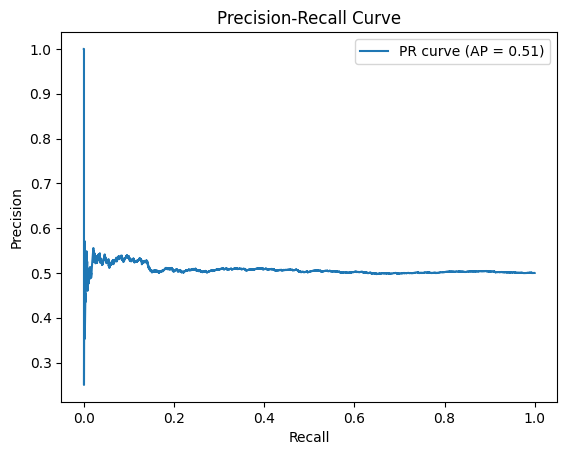


Stratified 5-Fold CV (AUC-PR): 0.5017 ± 0.0067

Top 10 Feature Importances (Logistic Regression Coefficients):
user_id              7.687227e-08
ip_address           6.553038e-12
day_of_week          2.935375e-12
age                  7.568682e-13
purchase_value       2.384337e-13
ip_int               1.815672e-13
hour_of_day          1.503440e-14
transaction_count    0.000000e+00
dtype: float64


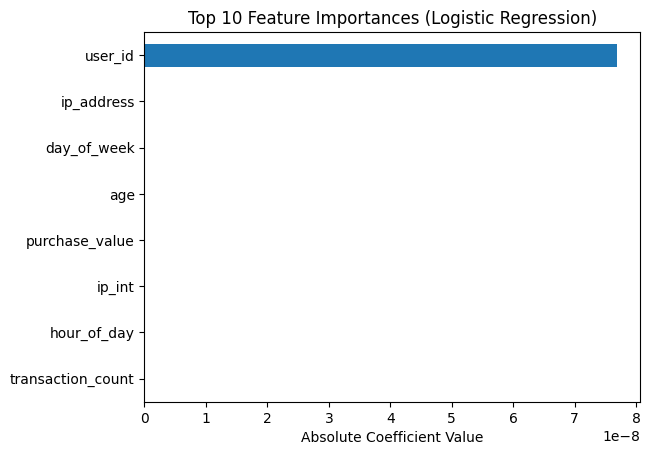

Logistic Regression metrics on fraud card dataset:
{'accuracy': 0.5046811517399753, 'precision': 0.5042819499341239, 'recall': 0.5409893992932863, 'f1': 0.5219911353562905, 'roc_auc': np.float64(0.5063436985519981), 'pr_auc': np.float64(0.5068685497710461), 'classification_report': {'0': {'precision': 0.5051428571428571, 'recall': 0.46838572942423173, 'f1-score': 0.48607038123167157, 'support': 2831.0}, '1': {'precision': 0.5042819499341239, 'recall': 0.5409893992932863, 'f1-score': 0.5219911353562905, 'support': 2830.0}, 'accuracy': 0.5046811517399753, 'macro avg': {'precision': 0.5047124035384905, 'recall': 0.5046875643587589, 'f1-score': 0.504030758293981, 'support': 5661.0}, 'weighted avg': {'precision': 0.5047124795769298, 'recall': 0.5046811517399753, 'f1-score': 0.5040275856430249, 'support': 5661.0}}}
Trained logistic regression model for fraud card data saved as 'model/fraud_logreg_model.joblib'


In [11]:
# Call logistic regression on the fraud card dataset and save the trained model to the model folder
from scripts.logistic_regression import run_logistic_regression, ImbalanceHandler, LogisticRegression
import joblib
import os
import pandas as pd
from sklearn.model_selection import train_test_split

fraud_data_path = '../data/processed/fraud_one_hot_encoded.csv'
fraud_logreg_metrics = run_logistic_regression(fraud_data_path, target_col='Class')
print("Logistic Regression metrics on fraud card dataset:")
print(fraud_logreg_metrics)

# Prepare data for saving the trained model
credit_df = pd.read_csv(fraud_data_path)
from src.data_split import separate_features_and_target
X, y = separate_features_and_target(credit_df, target_col='Class')
X_numeric = X.select_dtypes(include=['float64', 'int64'])

X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42, stratify=y
)
imbalance_handler = ImbalanceHandler()
X_train_bal, y_train_bal = imbalance_handler.apply_smote(X_train, y_train)
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_bal, y_train_bal)

# Ensure the model directory exists
os.makedirs('model', exist_ok=True)
joblib.dump(model, 'model/fraud_logreg_model.joblib')
print("Trained logistic regression model for fraud card data saved as 'model/fraud_logreg_model.joblib'")



### 2. Logistic regression on the credit card dataset


Loading data from: ../data/processed/credit_minmax_scaled.csv

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19   

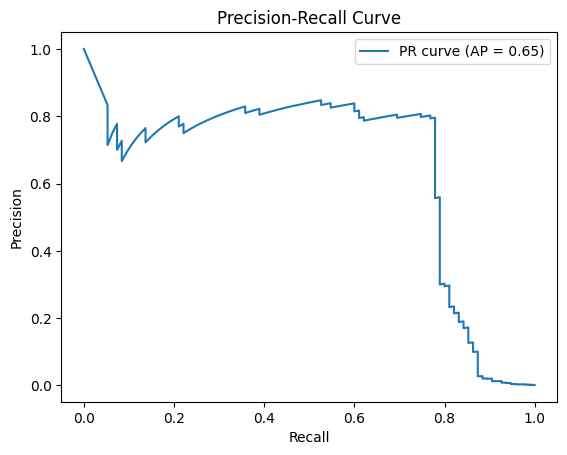


Stratified 5-Fold CV (AUC-PR): 0.7171 ± 0.0196

Top 10 Feature Importances (Logistic Regression Coefficients):
V14       29.930627
V8        28.722895
V10       20.956320
V5        19.932248
V7        18.381568
V12       17.563351
V4        17.517116
V21       16.170049
Amount    15.222776
V22       13.464788
dtype: float64


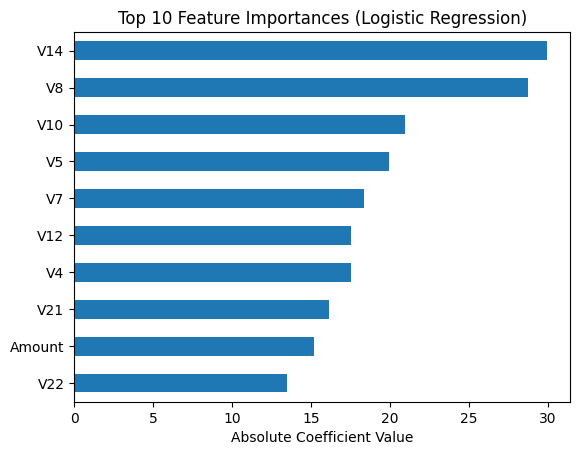

Logistic Regression metrics on credit card dataset:
{'accuracy': 0.9758397067634723, 'precision': 0.057558945908460474, 'recall': 0.8736842105263158, 'f1': 0.10800260247234873, 'roc_auc': np.float64(0.9600000557429655), 'pr_auc': np.float64(0.6487358619608047), 'classification_report': {'0': {'precision': 0.9997830175032547, 'recall': 0.9760110148099769, 'f1-score': 0.9877540083069091, 'support': 56651.0}, '1': {'precision': 0.057558945908460474, 'recall': 0.8736842105263158, 'f1-score': 0.10800260247234873, 'support': 95.0}, 'accuracy': 0.9758397067634723, 'macro avg': {'precision': 0.5286709817058576, 'recall': 0.9248476126681464, 'f1-score': 0.5478783053896289, 'support': 56746.0}, 'weighted avg': {'precision': 0.9982056149233106, 'recall': 0.9758397067634723, 'f1-score': 0.9862811928916502, 'support': 56746.0}}}
Trained logistic regression model for credit card data saved as 'model/credit_logreg_model.joblib'


In [12]:
# Call logistic regression on the credit card dataset and save the trained model to the model folder
from scripts.logistic_regression import run_logistic_regression, ImbalanceHandler, LogisticRegression
import joblib
import os
import pandas as pd
from sklearn.model_selection import train_test_split

credit_data_path = '../data/processed/credit_minmax_scaled.csv'
credit_logreg_metrics = run_logistic_regression(credit_data_path, target_col='Class')
print("Logistic Regression metrics on credit card dataset:")
print(credit_logreg_metrics)

# Prepare data for saving the trained model
credit_df = pd.read_csv(credit_data_path)
from src.data_split import separate_features_and_target
X, y = separate_features_and_target(credit_df, target_col='Class')
X_numeric = X.select_dtypes(include=['float64', 'int64'])

X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42, stratify=y
)
imbalance_handler = ImbalanceHandler()
X_train_bal, y_train_bal = imbalance_handler.apply_smote(X_train, y_train)
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_bal, y_train_bal)

# Ensure the model directory exists
os.makedirs('model', exist_ok=True)
joblib.dump(model, 'model/credit_logreg_model.joblib')
print("Trained logistic regression model for credit card data saved as 'model/credit_logreg_model.joblib'")



### 3. Lightgbm for fraud dataset


Loading data from: ../data/processed/fraud_one_hot_encoded.csv

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28302 entries, 0 to 28301
Columns: 164 entries, user_id to country_Zimbabwe
dtypes: bool(152), float64(7), int64(2), object(3)
memory usage: 6.7+ MB
None

Columns in DataFrame: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'age', 'ip_address', 'class', 'ip_int', 'hour_of_day', 'day_of_week', 'transaction_count', 'source_Ads', 'source_Direct', 'source_SEO', 'browser_Chrome', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'sex_F', 'sex_M', 'country_Afghanistan', 'country_Albania', 'country_Algeria', 'country_Angola', 'country_Argentina', 'country_Armenia', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahrain', 'country_Bangladesh', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'country_Benin', 'country_Bermuda', 'country_Bolivia', 'country_Bosnia and Herzegowina', 'country

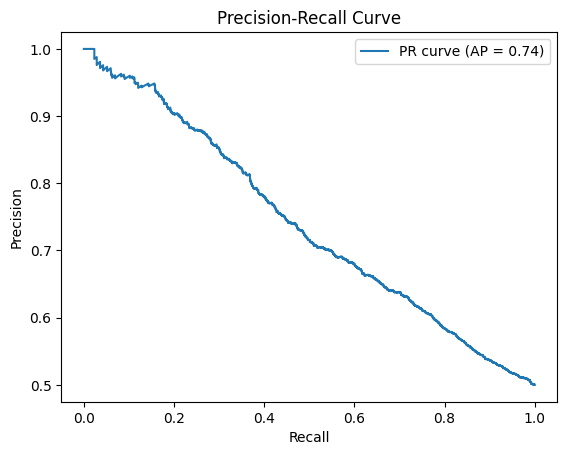

[LightGBM] [Info] Number of positive: 11321, number of negative: 11320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 22641, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 11320, number of negative: 11321
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 22641, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightG

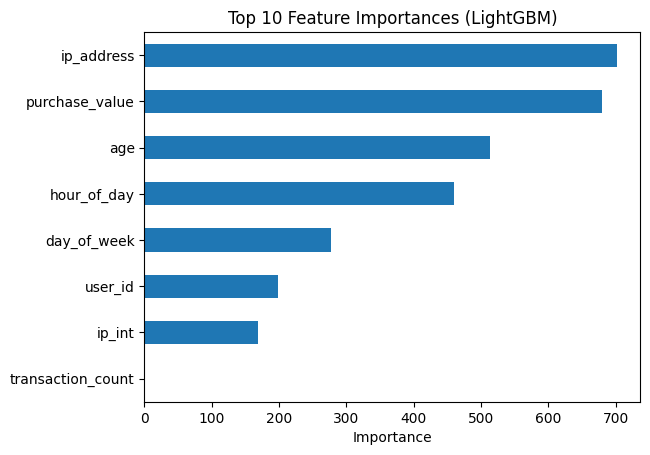

LightGBM metrics on fraud dataset:
{'accuracy': 0.6543013601837131, 'precision': 0.6545132743362831, 'recall': 0.653356890459364, 'f1': 0.6539345711759504, 'roc_auc': np.float64(0.7105776155711687), 'pr_auc': np.float64(0.739775378937787), 'classification_report': {'0': {'precision': 0.6540902679830748, 'recall': 0.6552454962910632, 'f1-score': 0.6546673725074995, 'support': 2831.0}, '1': {'precision': 0.6545132743362831, 'recall': 0.653356890459364, 'f1-score': 0.6539345711759504, 'support': 2830.0}, 'accuracy': 0.6543013601837131, 'macro avg': {'precision': 0.654301771159679, 'recall': 0.6543011933752136, 'f1-score': 0.654300971841725, 'support': 5661.0}, 'weighted avg': {'precision': 0.6543017337982275, 'recall': 0.6543013601837131, 'f1-score': 0.6543010365653896, 'support': 5661.0}}}
[LightGBM] [Info] Number of positive: 11321, number of negative: 11321
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wis

In [19]:
from scripts.lightgbm_model import run_lightgbm
import joblib
import os
import pandas as pd
from sklearn.model_selection import train_test_split

fraud_data_path = '../data/processed/fraud_one_hot_encoded.csv'
fraud_lgbm_metrics = run_lightgbm(fraud_data_path, target_col='class')
print("LightGBM metrics on fraud dataset:")
print(fraud_lgbm_metrics)

# Prepare data for saving the trained model
fraud_df = pd.read_csv(fraud_data_path)
from src.data_split import separate_features_and_target
X, y = separate_features_and_target(fraud_df, target_col='class')
X_numeric = X.select_dtypes(include=['float64', 'int64'])

X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42, stratify=y
)
from scripts.lightgbm_model import ImbalanceHandler
imbalance_handler = ImbalanceHandler()
X_train_bal, y_train_bal = imbalance_handler.apply_smote(X_train, y_train)

import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_bal, y_train_bal)

# Ensure the model directory exists
os.makedirs('model', exist_ok=True)
joblib.dump(model, 'model/fraud_lgbm_model.joblib')
print("Trained LightGBM model for fraud data saved as 'model/fraud_lgbm_model.joblib'")




### 4.  Lightgbm for credit dataset


Loading data from: ../data/processed/credit_minmax_scaled.csv

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19   

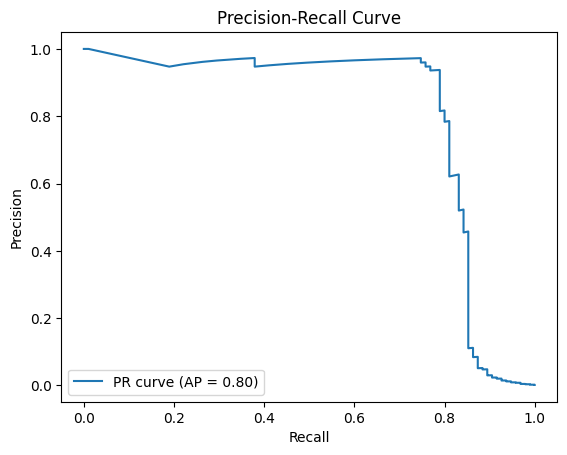

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 379, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 226981, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info

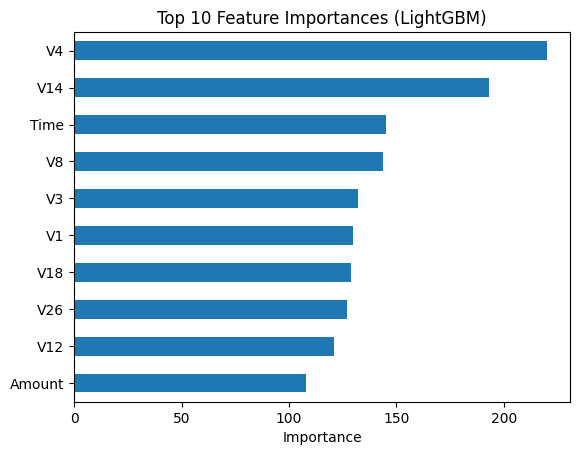

LightGBM metrics on credit dataset:
{'accuracy': 0.998766432876326, 'precision': 0.5939849624060151, 'recall': 0.8315789473684211, 'f1': 0.6929824561403509, 'roc_auc': np.float64(0.9748260122690267), 'pr_auc': np.float64(0.8023956023628687), 'classification_report': {'0': {'precision': 0.9997173794004911, 'recall': 0.9990467952904627, 'f1-score': 0.9993819748552055, 'support': 56651.0}, '1': {'precision': 0.5939849624060151, 'recall': 0.8315789473684211, 'f1-score': 0.6929824561403509, 'support': 95.0}, 'accuracy': 0.998766432876326, 'macro avg': {'precision': 0.7968511709032531, 'recall': 0.9153128713294418, 'f1-score': 0.8461822154977783, 'support': 56746.0}, 'weighted avg': {'precision': 0.9990381318832304, 'recall': 0.998766432876326, 'f1-score': 0.9988690232061394, 'support': 56746.0}}}
[LightGBM] [Info] Number of positive: 226602, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100094 seconds.
You can set `force_c

In [21]:
from scripts.lightgbm_model import run_lightgbm
import joblib
import os
import pandas as pd
from sklearn.model_selection import train_test_split

credit_data_path = '../data/processed/credit_minmax_scaled.csv'

# The correct target column in the credit dataset is likely 'Class' (not 'default')
credit_lgbm_metrics = run_lightgbm(credit_data_path, target_col='Class')
print("LightGBM metrics on credit dataset:")
print(credit_lgbm_metrics)

# Prepare data for saving the trained model
credit_df = pd.read_csv(credit_data_path)
from src.data_split import separate_features_and_target
X, y = separate_features_and_target(credit_df, target_col='Class')
X_numeric = X.select_dtypes(include=['float64', 'int64'])

X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42, stratify=y
)
from scripts.lightgbm_model import ImbalanceHandler
imbalance_handler = ImbalanceHandler()
X_train_bal, y_train_bal = imbalance_handler.apply_smote(X_train, y_train)

import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_bal, y_train_bal)

# Ensure the model directory exists
os.makedirs('model', exist_ok=True)
joblib.dump(model, 'model/credit_lgbm_model.joblib')
print("Trained LightGBM model for credit data saved as 'model/credit_lgbm_model.joblib'")
